## Imports

In [1]:
import torch
import torch.nn as nn
from torchsummary import summary
from transformer_v2 import Transformer, PositionalEncoding
from utils.constants import *
from utils.function_utils import *
from utils.visualize import *
from utils.optimizer_n_scheduler import create_optimizer_and_scheduler

### Init Tansformer

In [2]:
src_vocab_size = 10
tgt_vocab_size = 10

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model=MODEL_DIM, num_heads=MODEL_N_HEADS, num_layers=MODEL_N_LAYERS, d_ff=MODEL_FF, dropout=MODEL_DROPOUT, max_len=MODEL_MAX_SEQ_LEN)

### Forward in Transformer

In [6]:
src_tokens_ids_batch = torch.randint(1, 10, size  = (3, 2))
tgt_tokens_ids_batch = torch.randint(1, 10, size  = (3, 2))
out = transformer(src_tokens_ids_batch,tgt_tokens_ids_batch,src_mask = None, tgt_mask = None)

In [8]:
out.shape

torch.Size([3, 2, 10])

### Forward with Attention Weights visualization

In [7]:
src_tokens_ids_batch = torch.randint(1, 10, size  = (10, 10))
tgt_tokens_ids_batch = torch.randint(1, 10, size  = (10, 10))

In [8]:
out, enc_attention_weights, dec_self_attention_weights, dec_enc_attention_weights = transformer(src_tokens_ids_batch,tgt_tokens_ids_batch,src_mask = None, tgt_mask = None, return_attention=True)

In [11]:
layer = 3
head = 2

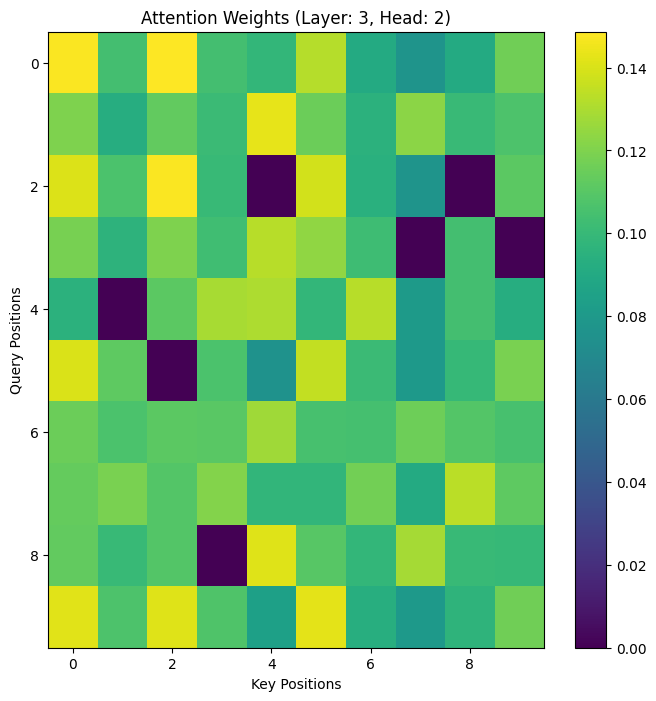

In [12]:
plot_attention_weights_layer_head(enc_attention_weights, layer, head)

### Model Summary

In [13]:
print(f'Size of the transformer = {count_parameters(transformer)}')

Size of the transformer = 44153866


In [14]:
print(transformer)

Transformer(
  (encoder_embedding): Embedding(10, 512)
  (decoder_embedding): Embedding(10, 512)
  (pos_encoding): PositionalEncoding()
  (encoder_layers): ModuleList(
    (0-5): 6 x EncoderLayer(
      (self_attn): MultiHeadAttention(
        (linear_q): Linear(in_features=512, out_features=512, bias=True)
        (linear_k): Linear(in_features=512, out_features=512, bias=True)
        (linear_v): Linear(in_features=512, out_features=512, bias=True)
        (linear_out): Linear(in_features=512, out_features=512, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (feed_forward): PositionwiseFeedForward(
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
      )
      (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (layer_norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (de

### Positional Encodings

In [17]:
encoding = PositionalEncoding(MODEL_DIM*4, MODEL_MAX_SEQ_LEN*4)
encodings_np = encoding.get_encodings()

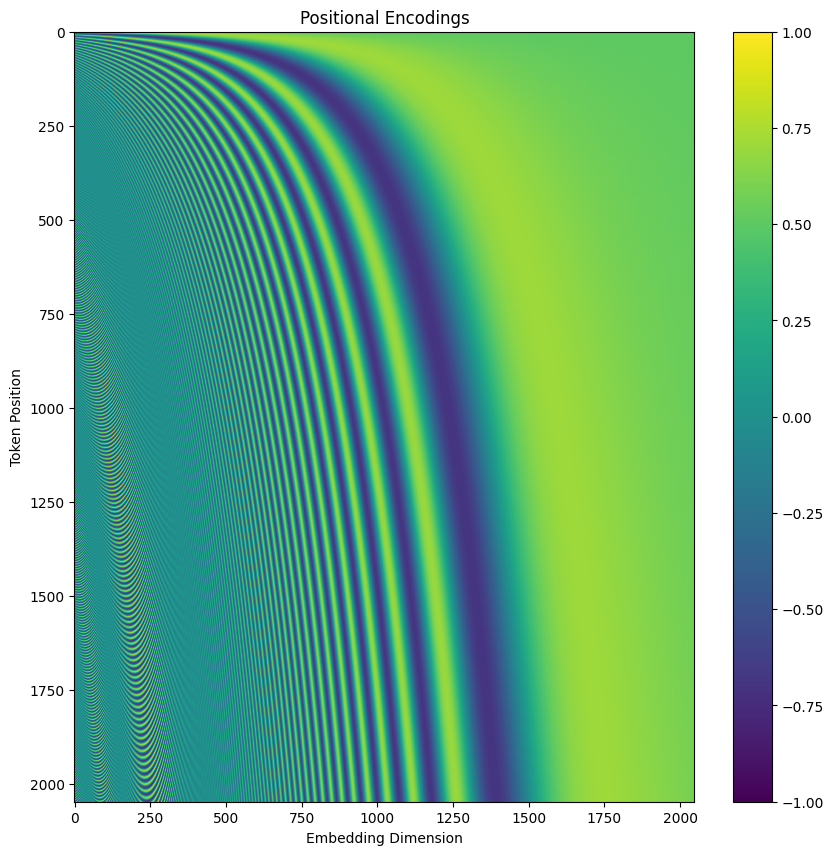

In [18]:
plot_positional_encodings(encodings_np)

### Learning Rate Decay Visualization

In [7]:
# Simple Hyper params

warmup_steps = 4000
init_lr = 5e-3
weight_decay = 0.001
optimizer, scheduler = create_optimizer_and_scheduler(transformer, MODEL_DIM, warmup_steps, init_lr, weight_decay)
num_steps = 150_000

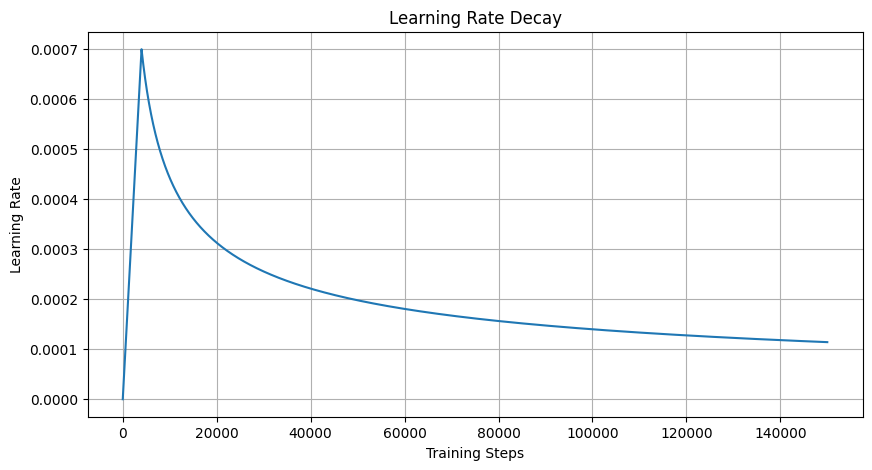

In [8]:
plot_learning_rate_decay(scheduler, num_steps)

### Plot Gradient Flow, to Identify Vanishing or Exploding Gradients

In [3]:
src_tokens_ids_batch = torch.randint(1, 10, size  = (3, 2))
tgt_tokens_ids_batch = torch.randint(1, 10, size  = (3, 2))
src_mask, tgt_mask = generate_masks(src_tokens_ids_batch, tgt_tokens_ids_batch, 0)
output = transformer(src_tokens_ids_batch, tgt_tokens_ids_batch, src_mask, tgt_mask)

In [4]:
warmup_steps = 4000
init_lr = 5e-3
weight_decay = 0.001
optimizer, scheduler = create_optimizer_and_scheduler(transformer, MODEL_DIM, warmup_steps, init_lr, weight_decay)
num_steps = 150_000

In [5]:
criterion = nn.CrossEntropyLoss(ignore_index=0)
loss = criterion(output.view(-1, tgt_vocab_size), tgt_tokens_ids_batch.contiguous().view(-1))
loss.backward()

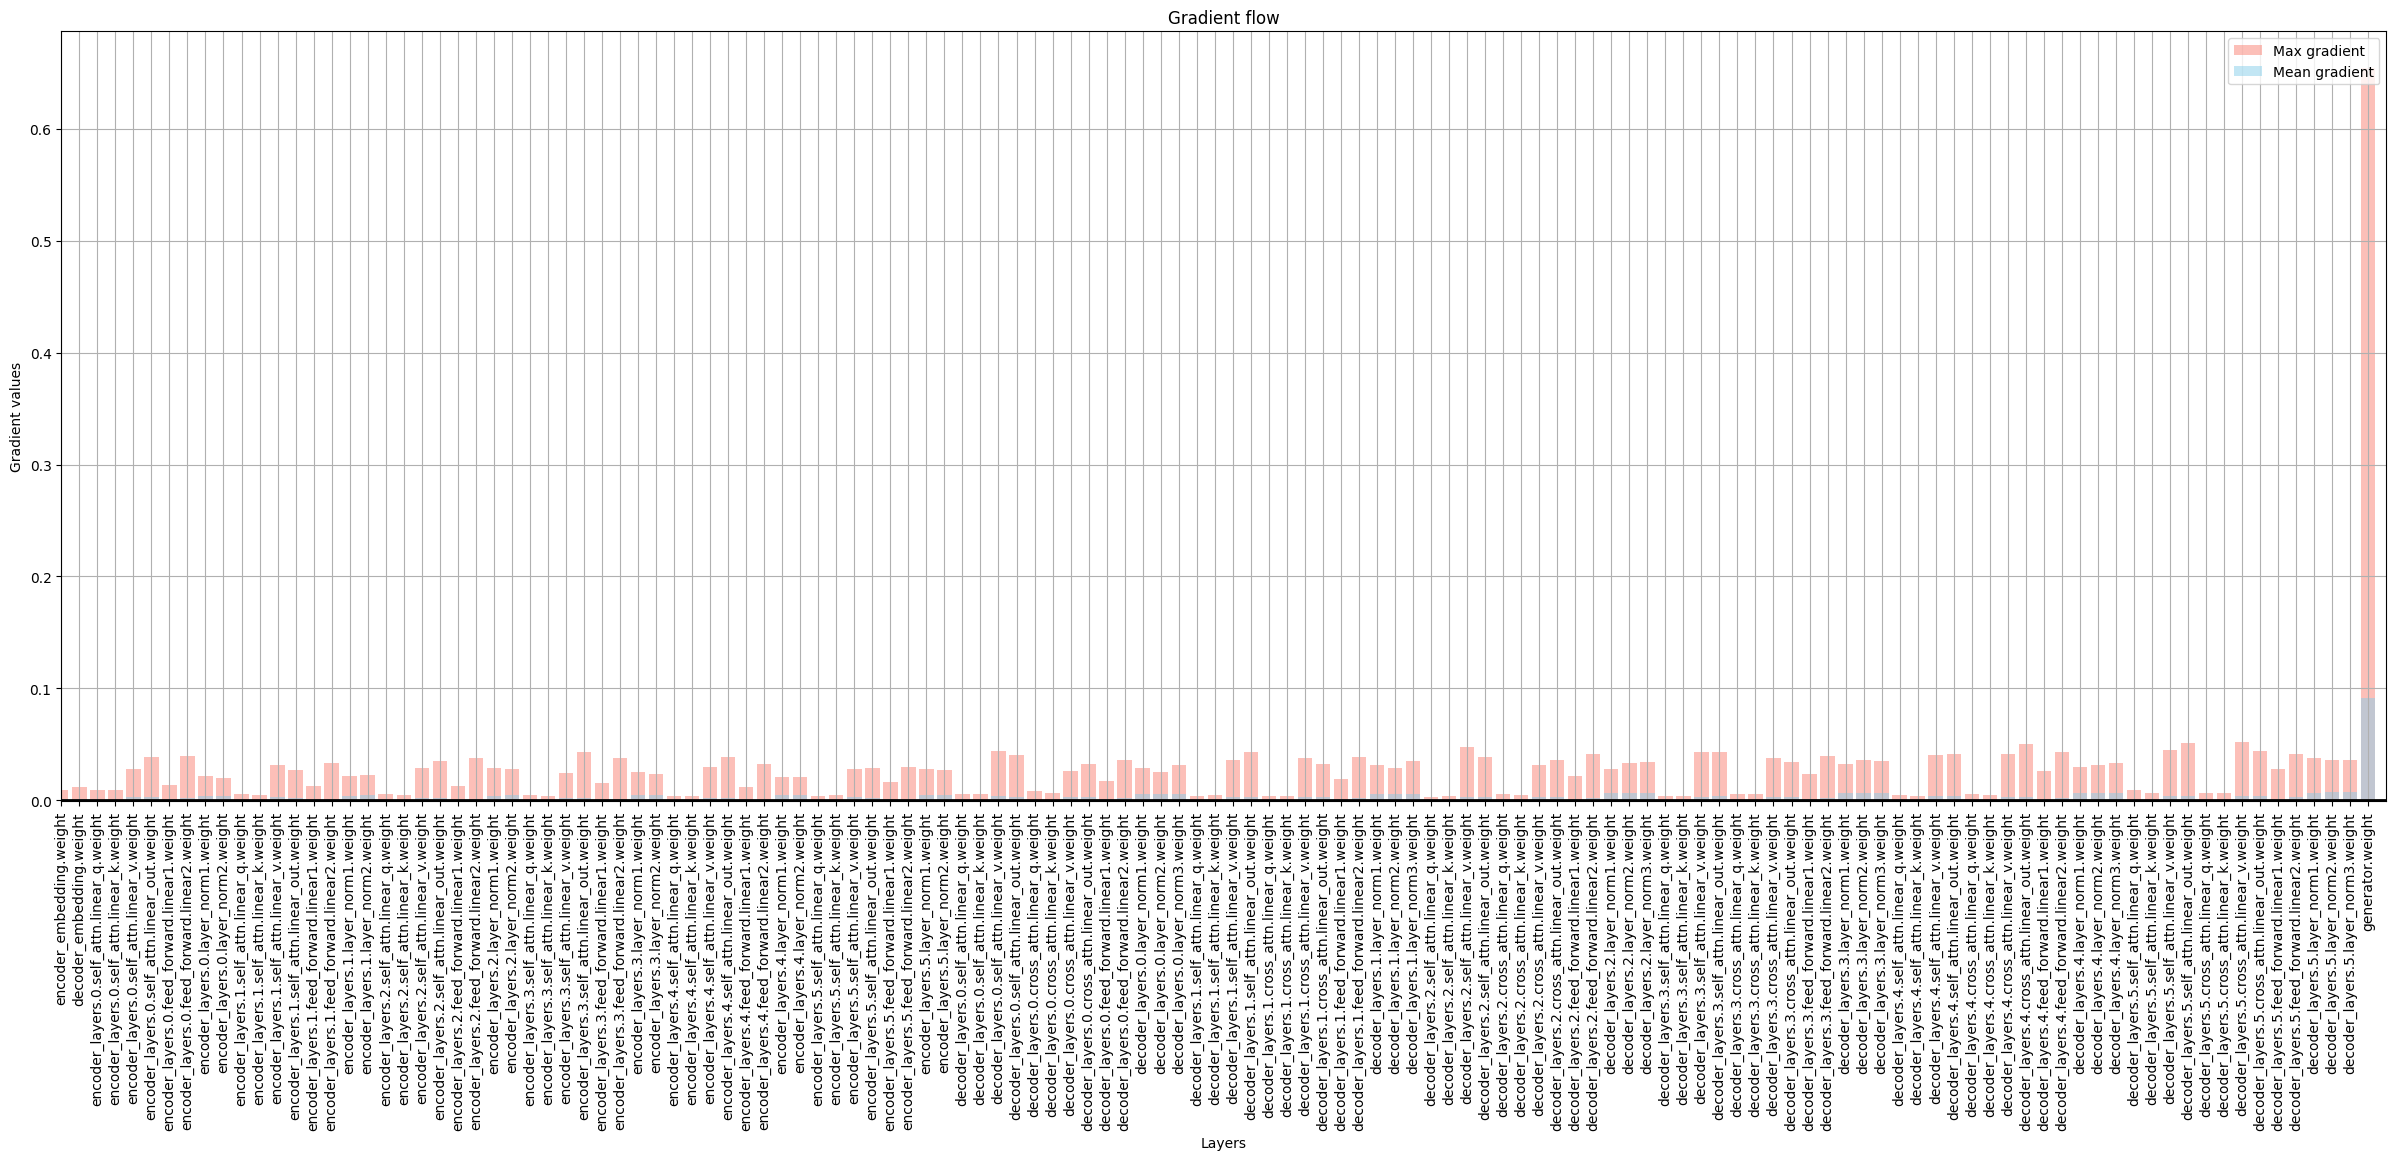

In [6]:
plot_grad_flow(transformer.named_parameters())